<a href="https://colab.research.google.com/github/jiongmumu/stock/blob/master/export_from_sheet_dell_financials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gspread
import pandas as pd
from google.auth import default
from google.colab import auth
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
spreadsheet = gc.open_by_key('1O8WgHwlY6UDtb9GdMlDp5oB5hYsZWkDc1YbbvVbfV9E')
worksheet = spreadsheet.get_worksheet(0)
df = pd.DataFrame(worksheet.get())
# Code for making the first row as header. Remove if not needed.
df.columns = df.iloc[0]
df = df.drop(0)
df.head()

,,May 2024,Feb 2024,Nov 2023,Aug 2023,May 2023,Feb 2023,Oct 2022,Jul 2022,Apr 2022,Jan 2022,Oct 2021
1,Total Revenues,"22,244.00","22,318.00","22,251.00","22,934.00","20,922.00","25,039.00","24,721.00","26,425.00","26,116.00","27,992.00","26,424.00"
2,Cost Of Revenues,"17,409.00","16,916.00","17,103.00","17,547.00","15,883.00","19,177.00","19,014.00","20,986.00","20,332.00","22,374.00","20,890.00"
3,Gross Profit,"4,835.00","5,402.00","5,148.00","5,387.00","5,039.00","5,862.00","5,707.00","5,439.00","5,784.00","5,618.00","5,534.00"
4,margin,0.22,0.24,0.23,0.23,0.24,0.23,0.23,0.21,0.22,0.20,0.21


In [ ]:
df.rename(columns={ df.columns[0]: "Property" }, inplace = True)

In [ ]:
df

,Property,May 2024,Feb 2024,Nov 2023,Aug 2023,May 2023,Feb 2023,Oct 2022,Jul 2022,Apr 2022,Jan 2022,Oct 2021
1,Total Revenues,"22,244.00","22,318.00","22,251.00","22,934.00","20,922.00","25,039.00","24,721.00","26,425.00","26,116.00","27,992.00","26,424.00"
2,Cost Of Revenues,"17,409.00","16,916.00","17,103.00","17,547.00","15,883.00","19,177.00","19,014.00","20,986.00","20,332.00","22,374.00","20,890.00"
3,Gross Profit,"4,835.00","5,402.00","5,148.00","5,387.00","5,039.00","5,862.00","5,707.00","5,439.00","5,784.00","5,618.00","5,534.00"
4,margin,0.22,0.24,0.23,0.23,0.24,0.23,0.23,0.21,0.22,0.20,0.21


In [ ]:
# remove one row
#df.drop([1], inplace=True)

In [ ]:
df.set_index(keys='Property', inplace=True)

In [ ]:
df

,May 2024,Feb 2024,Nov 2023,Aug 2023,May 2023,Feb 2023,Oct 2022,Jul 2022,Apr 2022,Jan 2022,Oct 2021
Property,,,,,,,,,,,
Total Revenues,"22,244.00","22,318.00","22,251.00","22,934.00","20,922.00","25,039.00","24,721.00","26,425.00","26,116.00","27,992.00","26,424.00"
Cost Of Revenues,"17,409.00","16,916.00","17,103.00","17,547.00","15,883.00","19,177.00","19,014.00","20,986.00","20,332.00","22,374.00","20,890.00"
Gross Profit,"4,835.00","5,402.00","5,148.00","5,387.00","5,039.00","5,862.00","5,707.00","5,439.00","5,784.00","5,618.00","5,534.00"
margin,0.22,0.24,0.23,0.23,0.24,0.23,0.23,0.21,0.22,0.20,0.21


In [ ]:

def custom_convert(value):
    try:
        return float(value.replace(',',''))
    except ValueError:
        return None  # or some default value like 0.0

df = df.applymap(custom_convert)


In [ ]:
df

,May 2024,Feb 2024,Nov 2023,Aug 2023,May 2023,Feb 2023,Oct 2022,Jul 2022,Apr 2022,Jan 2022,Oct 2021
Property,,,,,,,,,,,
Total Revenues,22244.00,22318.00,22251.00,22934.00,20922.00,25039.00,24721.00,26425.00,26116.00,27992.0,26424.00
Cost Of Revenues,17409.00,16916.00,17103.00,17547.00,15883.00,19177.00,19014.00,20986.00,20332.00,22374.0,20890.00
Gross Profit,4835.00,5402.00,5148.00,5387.00,5039.00,5862.00,5707.00,5439.00,5784.00,5618.0,5534.00
margin,0.22,0.24,0.23,0.23,0.24,0.23,0.23,0.21,0.22,0.2,0.21


In [ ]:
df=df.T

In [ ]:
df

Property,Total Revenues,Cost Of Revenues,Gross Profit,margin
0,,,,
May 2024,22244.0,17409.0,4835.0,0.22
Feb 2024,22318.0,16916.0,5402.0,0.24
Nov 2023,22251.0,17103.0,5148.0,0.23
Aug 2023,22934.0,17547.0,5387.0,0.23
May 2023,20922.0,15883.0,5039.0,0.24
Feb 2023,25039.0,19177.0,5862.0,0.23
Oct 2022,24721.0,19014.0,5707.0,0.23
Jul 2022,26425.0,20986.0,5439.0,0.21
Apr 2022,26116.0,20332.0,5784.0,0.22


<Axes: xlabel='0'>

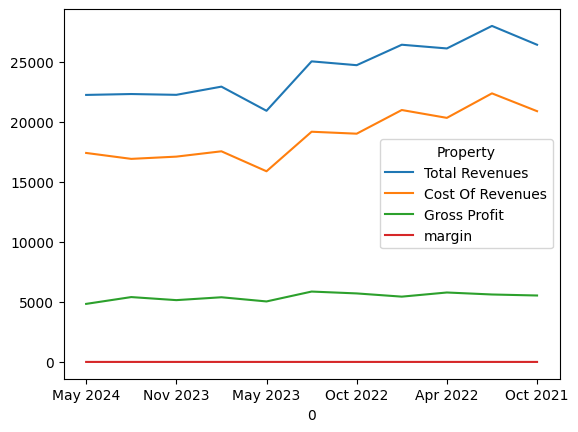

In [ ]:
#@title margin is not @ right axis
df.plot()

<Axes: xlabel='0', ylabel='margin'>

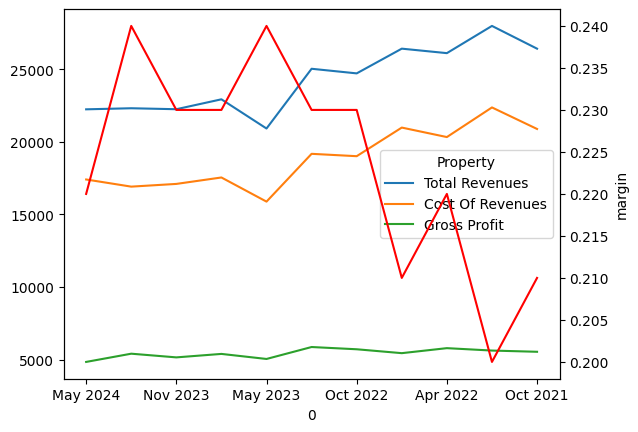

In [ ]:
ax1 = df[['Total Revenues',	'Cost Of Revenues',	'Gross Profit']].plot()

ax2 = ax1.twinx()
#ax2.spines['right'].set_position(('axes', 1.0))
df['margin'].plot(ax=ax2, color='r', ylabel='margin')


<Figure size 640x480 with 0 Axes>

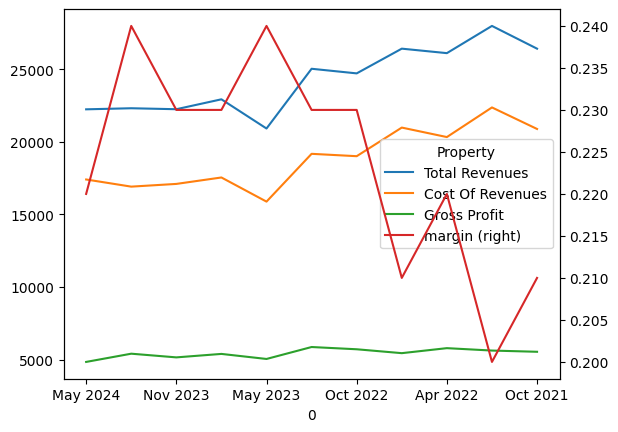

In [ ]:
import matplotlib.pyplot as plt
plt.figure()

#ax = df.plot(secondary_y=['Total Revenues', 'Cost Of Revenues', 'Gross Profit'])
ax= df.plot(secondary_y=['margin'])